In [1]:
import yaml
import pathlib

menus = []
for menu in pathlib.Path("menus/").glob("*.yaml"):
    with menu.open("r") as f:
        menus.append( yaml.load(f, Loader=yaml.FullLoader) )

recipes = {recipe.stem for recipe in pathlib.Path("recipes/").glob("*.yml")}


In [6]:
from collections import defaultdict

counts = defaultdict(float)
for menu in menus:
    for title, parts in menu.items():
        for definition in parts:
            for name, amounts in definition.items():
                if name in recipes:
                    if amounts["unit"] == "plates":
                        counts[name.replace("_", " ")] += amounts["amount"]
counts_series = pd.Series(counts).sort_values()

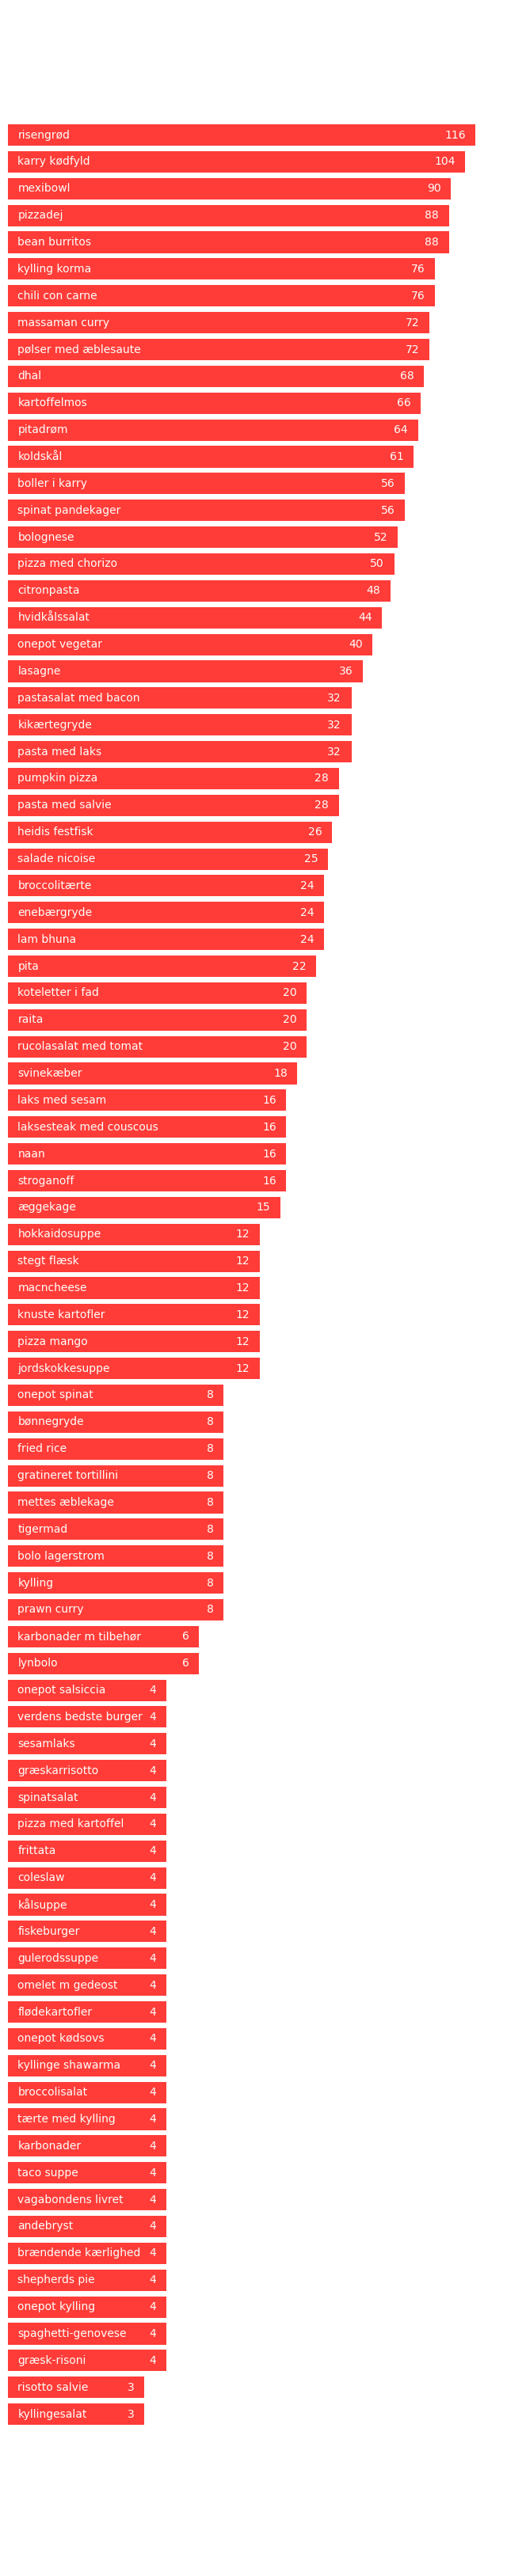

In [34]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


f, ax = plt.subplots(figsize=(8, 42))
bars = ax.barh(counts_series.index, np.log(counts_series.values + 1), color="#FF3C38")


for name, bar in zip(counts_series.index, bars):
    x, y = bar.get_xy()
    w = bar.get_width()
    n = np.exp(w) - 1
    h = bar.get_height()
    
    name_len = len(name)*.05
    
    ax.annotate( name, (0.1, y + h/2), va="center", color="#FDFFFC" )
    
    ax.annotate( f"{n:.0f}", (w-0.1, y + h/2), va="center", ha="right", color="#FDFFFC" )
    

#ax.set_xlabel("Portioner lavet", fontsize=20)
ax.set_yticks([])
ax.set_xticklabels([])

plt.setp(ax.spines.values(), visible=False)

ax.tick_params(axis='both', which='major', labelsize=16, width=0)
#ax.grid(axis="x", color="#FDFFFC")


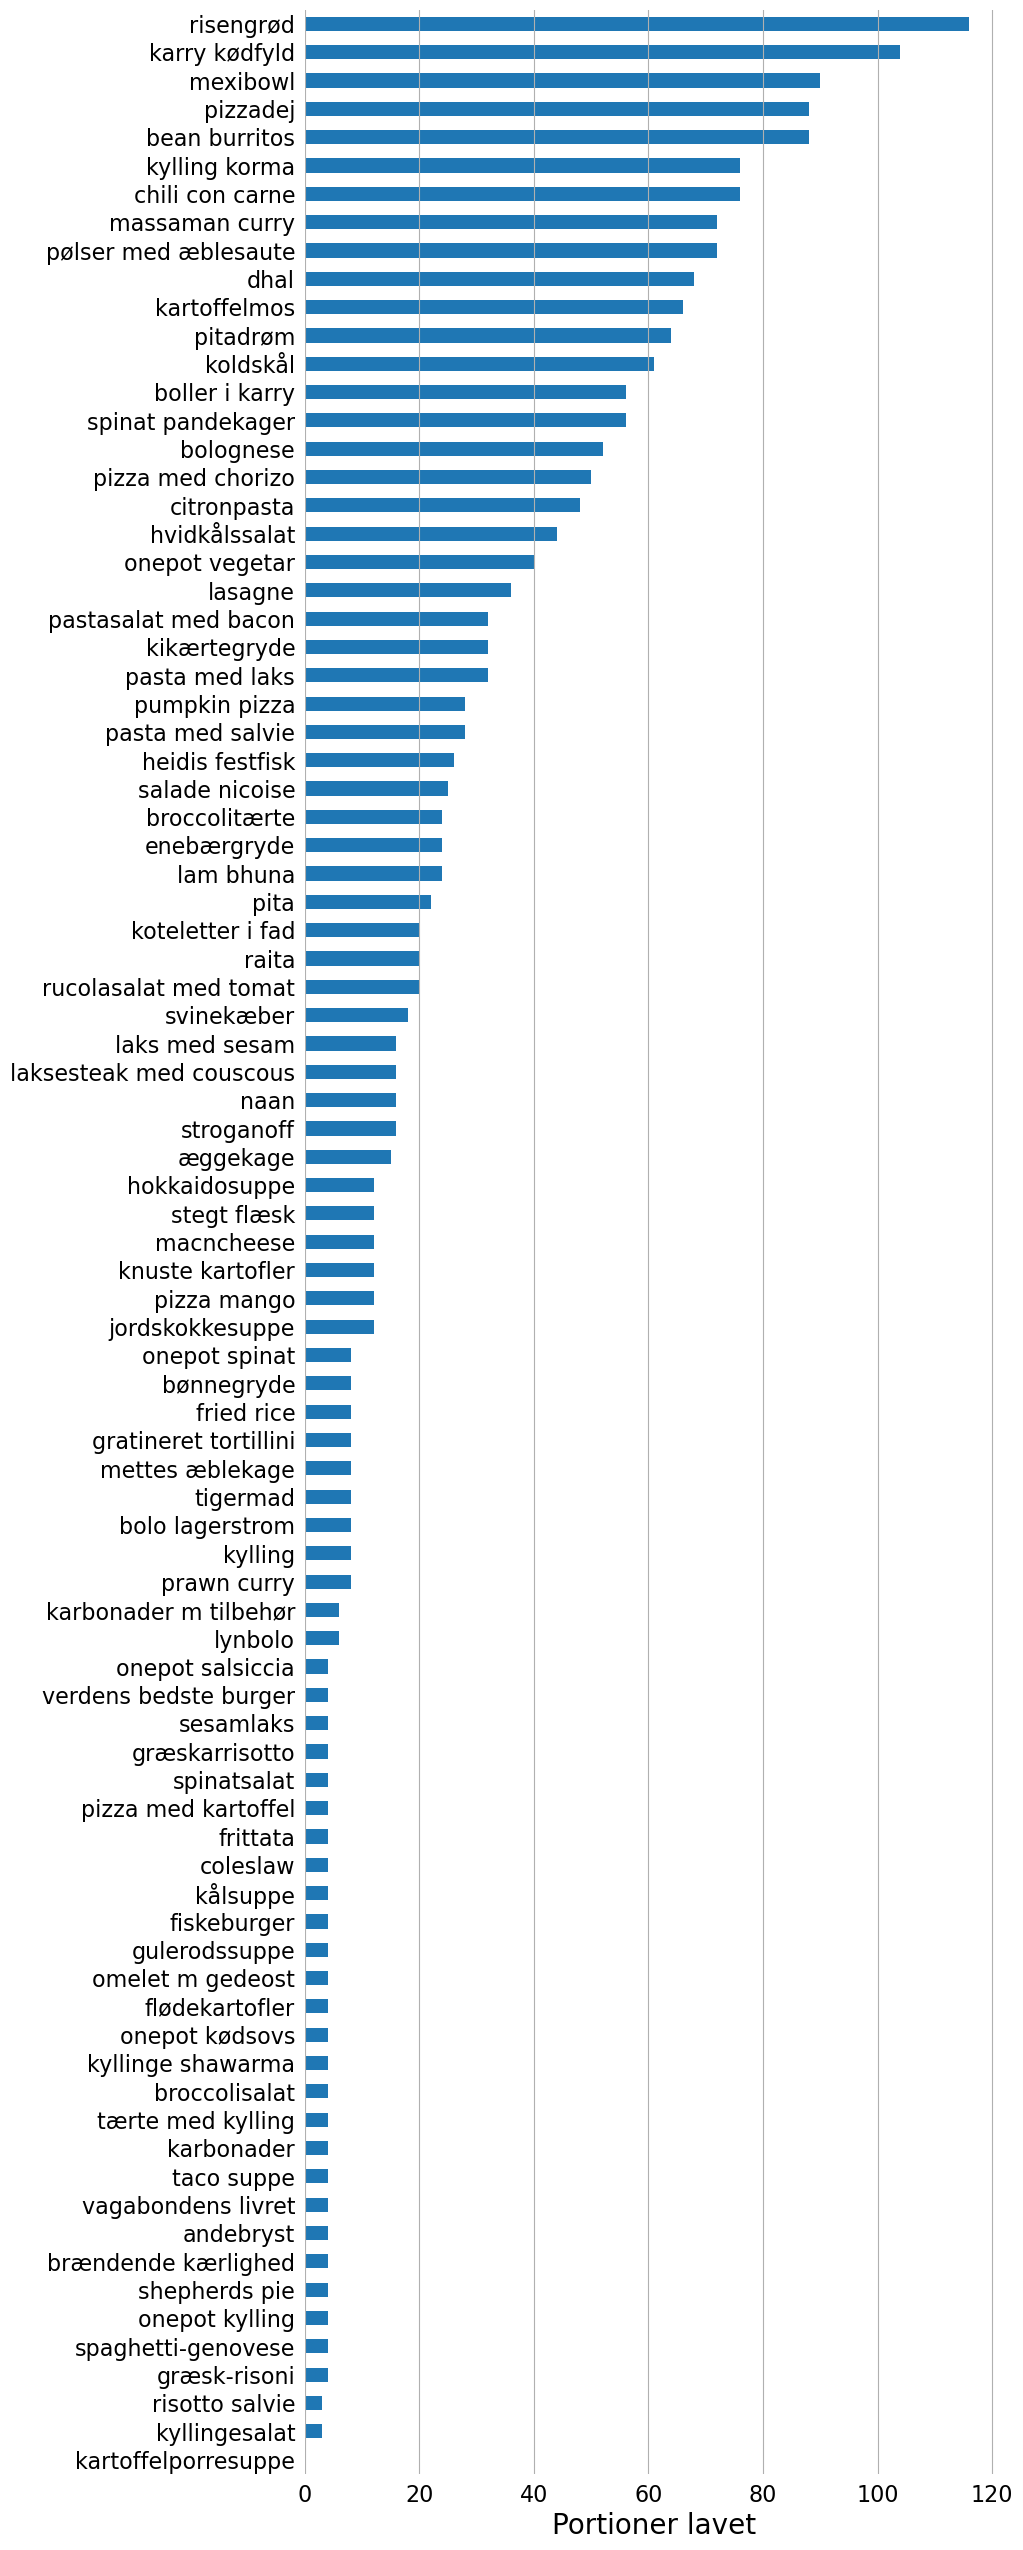

In [5]:

f, ax = plt.subplots(figsize=(9, 32))


counts_series.plot.barh(ax=ax)
ax.set_xlabel("Portioner lavet", fontsize=20)

plt.setp(ax.spines.values(), visible=False)

ax.tick_params(axis='both', which='major', labelsize=16, width=0)
ax.grid(axis="x")

plt.savefig("menus.png", dpi=300, bbox_inches="tight")

